In [1]:
from pylab import *
from scipy.integrate import *
%matplotlib inline

In [17]:
def ec_mov(x_p,t,epsilon=1.):
    # x_p = x,y,px,py
    r32 = ( x_p[0]**2 + x_p[1]**2 )**(1.5)
    dx = x_p[2]
    dy = epsilon*x_p[3]
    dpx = -x_p[0]/r32
    dpy = -x_p[1]/r32
    return array([dx,dy,dpx,dpy])

def energia(x_p,epsilon=1.):
    # x_p = x,y,px,py
    r = sqrt( x_p[0]**2 + x_p[1]**2 )
    E = 0.5*(x_p[2]**2 + epsilon*x_p[3]**2) - 1./r
    return E

def cond_ini(alfa,var=0.001):
    angulo= alfa+var*(2.*rand()-1.)
    x,y = cos(angulo),sin(angulo)
    return array([x,y,0.25,0])

def p_rho(x_p):
    # x_p = x,y,px,py
    x,y,px,py = x_p[:,0],x_p[:,1],x_p[:,2],x_p[:,3]
    r = sqrt( x**2 + y**2 )
    p_r = (x*px + y*py)/r
    return p_r,r

E=  -0.5 E_f=  -0.500000240425
E=  -0.5 E_f=  -0.500000179799
E=  -0.5 E_f=  -0.500000191809
E=  -0.5 E_f=  -0.500000387815
E=  -0.5 E_f=  -0.500000192572
E=  -0.5 E_f=  -0.500000317634
E=  -0.5 E_f=  -0.499999932138
E=  -0.5 E_f=  -0.50000015377
E=  -0.5 E_f=  -0.500000191297
E=  -0.5 E_f=  -0.500000359998


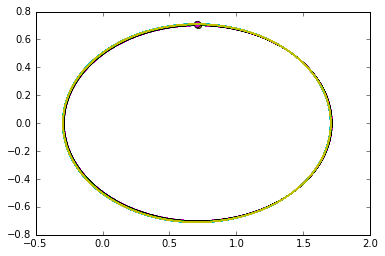

In [3]:
t = arange(0,100,.0001)
eps = 1
for i in range(10):
    pto_ini = cond_ini(pi/4,0.01)
    plot(pto_ini[0],pto_ini[1],'o')
    sol = odeint(ec_mov,pto_ini,t,args=(eps,),atol=1e-9,rtol=1e-9)
    plot(sol[:,0],sol[:,1])
    print "E= ", energia(pto_ini,eps), "E_f= ",energia(sol[-1],eps)
show()

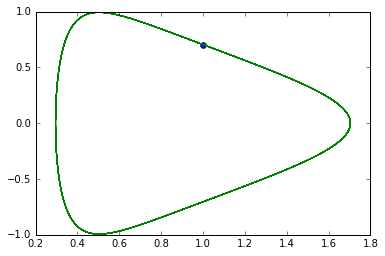

In [4]:
pr,r = p_rho(sol)
plot(r[0],pr[0],'o')
plot(r,pr)
show()

In [5]:
def root_trayec(func,pto_i,ti,error=1e-5):
    while abs(pto_i[0])>error:
        tip1 = ti - (pto_i[0]/pto_i[2])
        paso = odeint(func,pto_i,[ti,tip1])
        ti,pto_i = tip1,paso[-1]
    return ti,pto_i

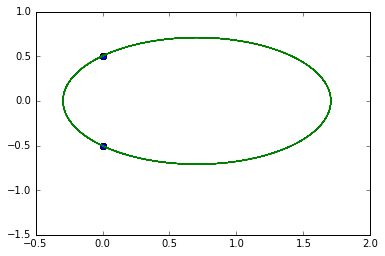

In [6]:
num = len(t)
raices = zeros(num)
puntos = zeros((num,4))
j=0
for i in range(len(t)-1):
    if (sol[i][0]*sol[i+1][0]) < 0:
        raices[j],puntos[j] = root_trayec(ec_mov,sol[i],t[i])
        j+=1
raices,puntos = raices[0:j],puntos[0:j]
xlim([-0.5,2]),ylim([-1.5,1])
plot(puntos[:,0],puntos[:,1],'o')
plot(sol[:,0],sol[:,1])
show()

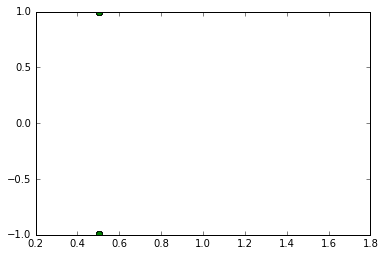

In [7]:
pr,r = p_rho(puntos)
xlim([0.2,1.8]),ylim([-1,1])
plot(r[0],pr[0],'o')
plot(r,pr,'o')
show()

## $\epsilon = 1$

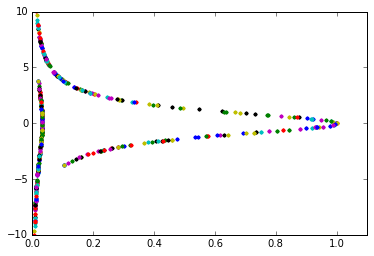

In [24]:
t = arange(0,10,.0001)
N_trayectorias,eps = 300,1
for i in range(N_trayectorias):
    pto_ini = cond_ini(pi/4,pi/2)
    sol = odeint(ec_mov,pto_ini,t,args=(eps,),atol=1e-9,rtol=1e-9)
    #print "E=", energia(pto_ini,eps), "E_f=", energia(sol[-1],eps)
    num,raices,puntos = len(t),zeros(num),zeros((num,4))
    j=0
    for k in range(len(t)-1):
        if (sol[k][0]*sol[k+1][0]) < 0:
            raices[j],puntos[j] = root_trayec(ec_mov,sol[k],t[k])
            j+=1
    raices,puntos = raices[0:j],puntos[0:j]
    pr,r = p_rho(puntos)
    xlim([0,1.1]),ylim([-10,10])
    plot(r,pr,'.')
show()

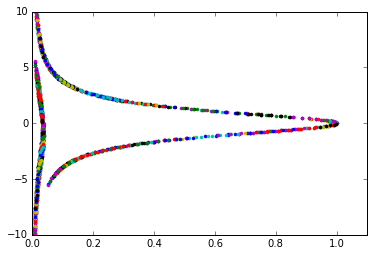

In [26]:
t = arange(0,10,.0001)
N_trayectorias,eps = 300,1.01
for i in range(N_trayectorias):
    pto_ini = cond_ini(pi/4,pi/2)
    sol = odeint(ec_mov,pto_ini,t,args=(eps,),atol=1e-9,rtol=1e-9)
    #print "E=", energia(pto_ini,eps), "E_f=", energia(sol[-1],eps)
    num,raices,puntos = len(t),zeros(num),zeros((num,4))
    j=0
    for k in range(len(t)-1):
        if (sol[k][0]*sol[k+1][0]) < 0:
            raices[j],puntos[j] = root_trayec(ec_mov,sol[k],t[k])
            j+=1
    raices,puntos = raices[0:j],puntos[0:j]
    pr,r = p_rho(puntos)
    xlim([0,1.1]),ylim([-10,10])
    plot(r,pr,'.')
show()

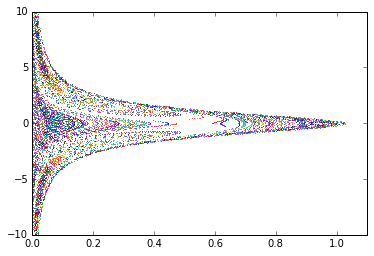

In [28]:
t = arange(0,100,.0001)
N_trayectorias,eps = 200,1.1
for i in range(N_trayectorias):
    pto_ini = cond_ini(pi/4,pi/2)
    sol = odeint(ec_mov,pto_ini,t,args=(eps,),atol=1e-9,rtol=1e-9)
    #print "E=", energia(pto_ini,eps), "E_f=", energia(sol[-1],eps)
    num,raices,puntos = len(t),zeros(num),zeros((num,4))
    j=0
    for k in range(len(t)-1):
        if (sol[k][0]*sol[k+1][0]) < 0:
            raices[j],puntos[j] = root_trayec(ec_mov,sol[k],t[k])
            j+=1
    raices,puntos = raices[0:j],puntos[0:j]
    pr,r = p_rho(puntos)
    xlim([0,1.1]),ylim([-10,10])
    plot(r,pr,'.',markersize=0.7)
show()